## **Importing The Libraries**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Description About Health Data**

S.No : Attribute Value -  Description

1 :    age 29 – 62 age in years

2 :   sex 1 – male, 0- female gender

3 :  cp -  1-typical angina; 2-atypical angina;
    3-non-anginal pain; 4-asymptomatic  - chest pain type

4 :  trtbps - Numeric value(140mm/Hg) - resting blood pressure in mm/Hg

5 :  chol - Numeric value(289mg/dl) - serum cholesterol in mg/dl

6 :  fbs-  1-true, 0-false - fasting blood pressure>120mg/dl

7 :  restecg-  0-normal, 1-having ST-T, 2-hypertrophy - resting      electrocardiographic results

8 : thalachh - 140,173 -  maximum heart rate achieved

9 : exng-  1-yes, 0-no - exercise induced angina

10 : oldpeak-  Numeric value - ST depression induced by exercise relative
to rest

11 : slope 1-upsloping, 2-flat, 3-downsloping - the slope of the peak exercise ST segment

12 : caa - 0-3 vessels-  number of major vessels colored by
flourosopy

13 : thall - 3-normal, 6-fixed defect, 7-reversable defect - thalassemia

14 : output - yes - 1 , no - 0


## Load The File

In [7]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [10]:
 df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [13]:
100*df['output'].value_counts()/len(df['output'])

1    54.455446
0    45.544554
Name: output, dtype: float64

In [14]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

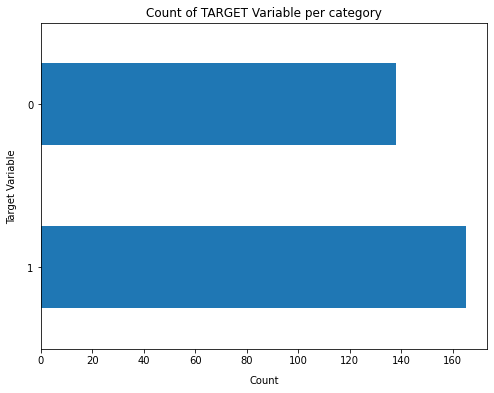

In [15]:
df['output'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=10)
plt.ylabel("Target Variable", labelpad=10)
plt.title("Count of TARGET Variable per category");

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# Get the max age
print(df['age'].max()) 

77


In [18]:
# Group the age in bins of 20 
labels = ["{0} - {1}".format(i, i + 14) for i in range(1, 77, 15)]

df['age_group'] = pd.cut(df.age, range(1, 80, 15), right=False, duplicates="drop")


In [19]:
df['age_group'].value_counts()

[46, 61)    160
[61, 76)     77
[31, 46)     63
[16, 31)      1
[1, 16)       0
Name: age_group, dtype: int64

In [20]:
print(df['chol'].min())

126


In [21]:
print(df['chol'].max())

564


In [22]:
# Group the chol in bins of 20 
labels = ["{0} - {1}".format(i, i + 114) for i in range(1, 565, 115)]

df['chol_group'] = pd.cut(df.chol, range(1, 600, 115), right=False, labels=labels)

In [23]:
df['chol_group'].value_counts()

231 - 345    172
116 - 230    123
346 - 460      7
461 - 575      1
1 - 115        0
Name: chol_group, dtype: int64

In [24]:
print(df['thalachh'].min())

71


In [25]:
print(df['thalachh'].max())

202


In [26]:
# Group the thalachh in bins of 41 
labels = ["{0} - {1}".format(i, i + 40) for i in range(1, 202, 41)]

df['thalachh_group'] = pd.cut(df.thalachh, range(1, 250, 41), right=False, duplicates="drop")

In [27]:
df['thalachh_group'].value_counts()

[124, 165)    176
[165, 206)     83
[83, 124)      43
[42, 83)        1
[206, 247)      0
[1, 42)         0
Name: thalachh_group, dtype: int64

In [28]:
print(df['trtbps'].min())

94


In [29]:
print(df['trtbps'].max())

200


In [30]:
# Group the trtbps in bins of 65 
labels = ["{0} - {1}".format(i, i + 64) for i in range(90, 202, 65)]

df['trtbps_group'] = pd.cut(df.trtbps, range(90, 225, 65), right=False, duplicates="drop")

In [31]:
df['trtbps_group'].value_counts()

[90, 155)     275
[155, 220)     28
Name: trtbps_group, dtype: int64

## Data Exploration
 Plot distibution of individual predictors by churn

## Univariate Analysis

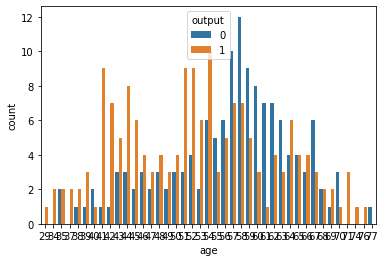

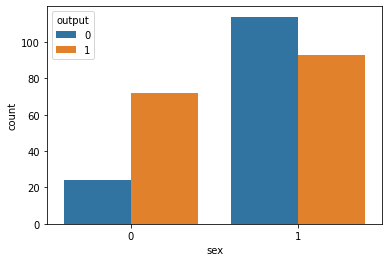

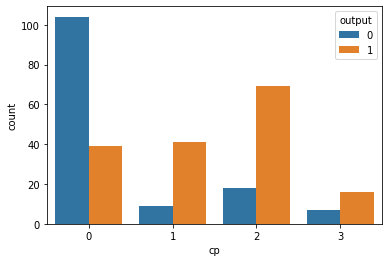

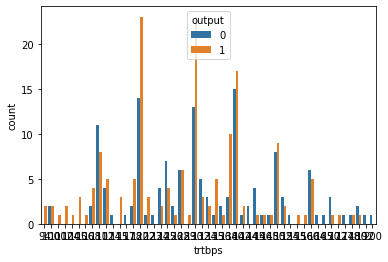

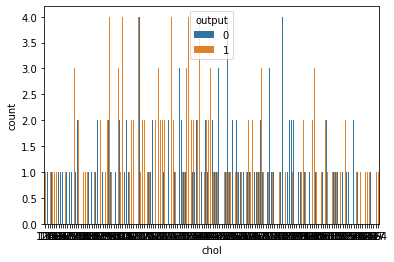

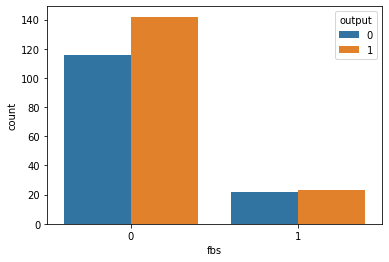

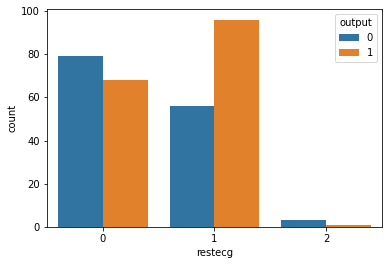

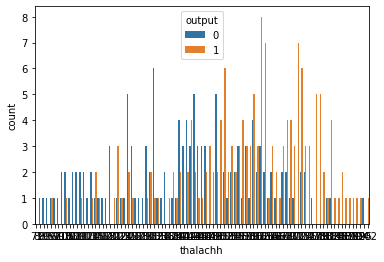

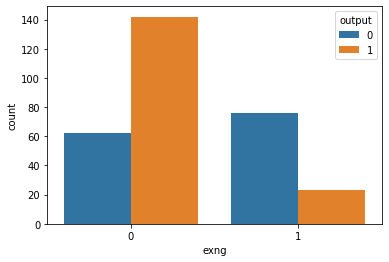

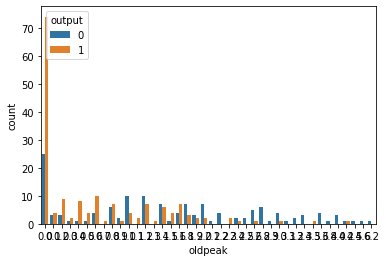

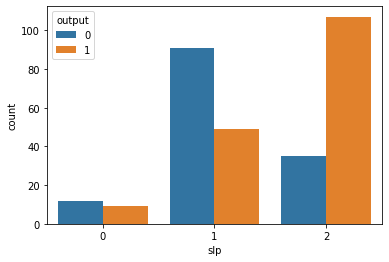

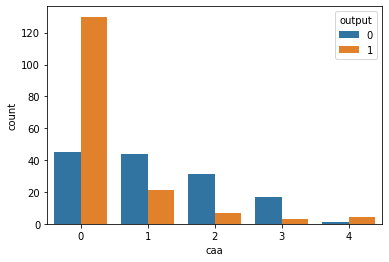

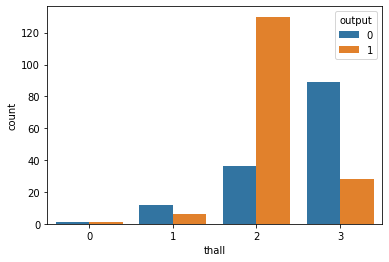

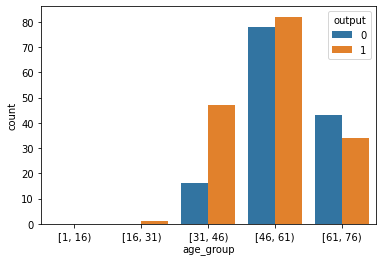

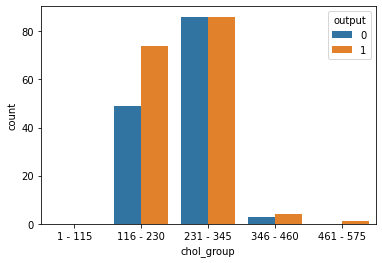

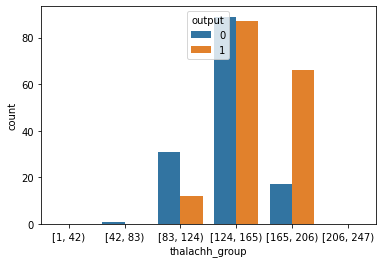

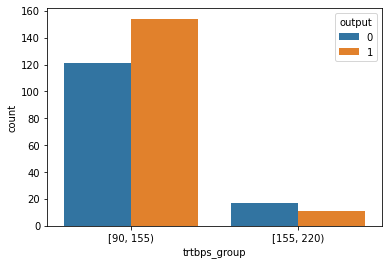

In [32]:
for i, predictor in enumerate(df.drop(columns=['output'])):
    plt.figure()
    sns.countplot(data=df, x=predictor, hue='output')

**Insights:**

1. peoples age betn 46 to 61 are more likely to have a heart attack.
2. from analysis we can say that male are more likely to have a heart attack disease.
3. more people have a typical angina disease.
4. those people have resting blood pressure is in  betn 90 to 155 they are more chances to have heart attack.

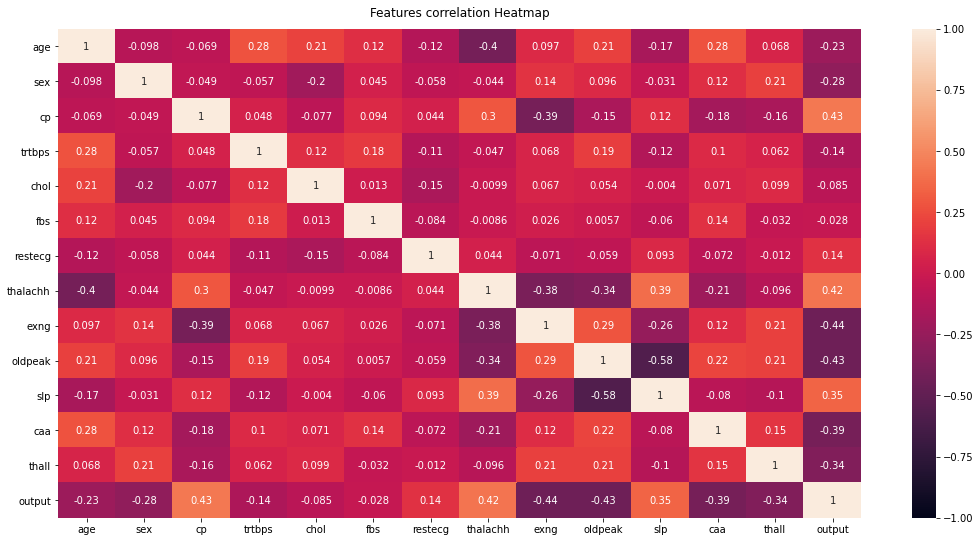

In [33]:
# Check the correlation between features of the dataset
plt.figure(figsize=(18, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The output variables is more correlated with 'cp', 'thalachh' and 'slp'

## Bivariate Analysis

In [34]:
new_df1_target0=df.loc[df["output"]==0]
new_df1_target1=df.loc[df["output"]==1]

In [35]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(8 , 8)
    plt.xticks(rotation=45)
    plt.yscale('linear')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

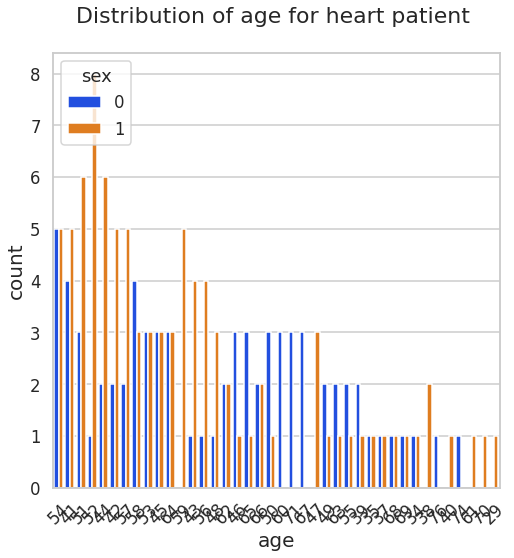

In [36]:
uniplot(new_df1_target1,col='age',title='Distribution of age for heart patient ',hue='sex')

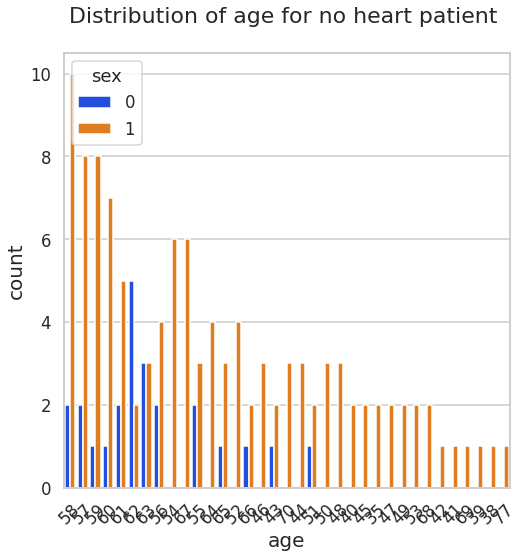

In [37]:
uniplot(new_df1_target0,col='age',title='Distribution of age for no heart patient ',hue='sex')

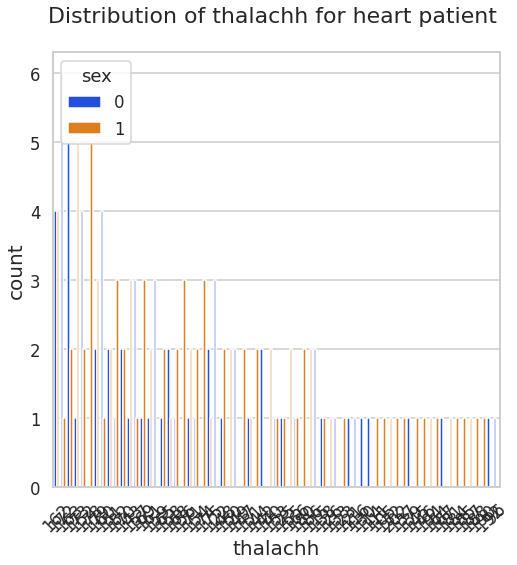

In [38]:
uniplot(new_df1_target1,col='thalachh',title='Distribution of thalachh for heart patient ',hue='sex')

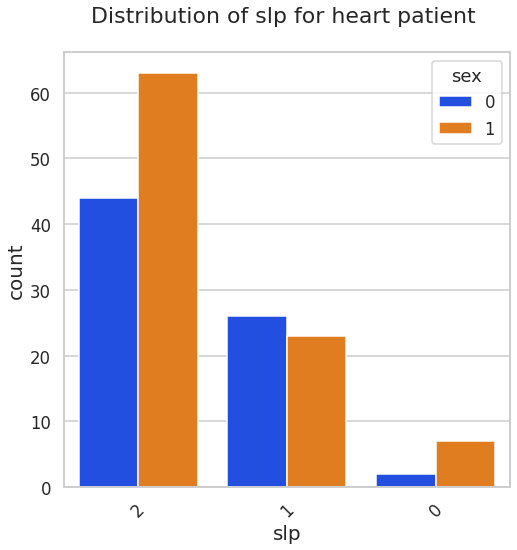

In [39]:
uniplot(new_df1_target1,col='slp',title='Distribution of slp for heart patient ',hue='sex')

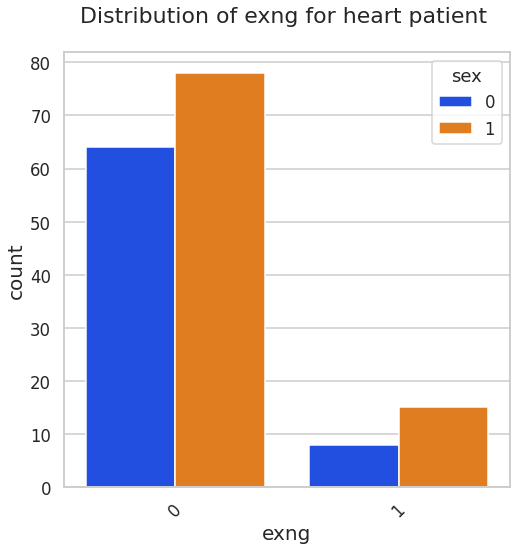

In [40]:
uniplot(new_df1_target1,col='exng',title='Distribution of exng for heart patient ',hue='sex')

## **Coclusion On Data Exploration**

1. those male are age in betn 46 to 61 are more male infected by heart attack.
2. maximun heart rate (124 to 206)achieved by male compared to female.
3.  more males are infectected those have flat slope are more chances to get heart attack.

## Model Building

In [41]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [42]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group,chol_group,thalachh_group,trtbps_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"[61, 76)",231 - 345,"[124, 165)","[90, 155)"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"[31, 46)",231 - 345,"[165, 206)","[90, 155)"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"[31, 46)",116 - 230,"[165, 206)","[90, 155)"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"[46, 61)",231 - 345,"[165, 206)","[90, 155)"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"[46, 61)",346 - 460,"[124, 165)","[90, 155)"


In [43]:
df.drop(columns= ['age_group','chol_group','thalachh_group','trtbps_group'], axis=1, inplace=True)

In [44]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
X=df.drop('output',axis=1)
y=df['output']

In [46]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

##### Train Test Split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state = 0)

## **Feature Scalling**

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [68]:
X_train.shape

(212, 13)

In [69]:
y_train.shape

(212,)

In [70]:
y_test.shape

(91,)

In [71]:
X_test.shape

(91, 13)

#### Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model_rf=RandomForestClassifier()

In [80]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [81]:
y_pred=model_rf.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [83]:
print(metrics.confusion_matrix(y_test, y_pred))

[[33 11]
 [ 4 43]]


#### Decision Tree Classifier

In [84]:
model_dt=DecisionTreeClassifier()

In [85]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
y_pred=model_dt.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [88]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        44
           1       0.74      0.68      0.71        47

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



In [89]:
print(metrics.confusion_matrix(y_test, y_pred))

[[33 11]
 [15 32]]


## **Logistic Regression Classifier**

In [93]:
from sklearn.linear_model import LogisticRegression

In [95]:
model_log=LogisticRegression()

In [96]:
model_log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred1=model_log.predict(X_test)
y_pred1

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0])

In [98]:
print(classification_report(y_test, y_pred1,))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [99]:
print(metrics.confusion_matrix(y_test, y_pred1))

[[32 12]
 [ 5 42]]


## **Conclusion**

I Conclude that Random forest classifier algorithm is good model
 to predict that patient has disease from heart attack or not.